In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from math import isnan
%matplotlib inline

In [2]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/1515a93c-73e3-4425-9b35-1cd11b2196da", low_memory = False)
data.head(10)

,id,address_number,street,common_name,scientific_name,height,width,growth_space_length,growth_space_width,growth_space_type,...,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,754166088,7428,MONTICELLO ST,Stump,Stump,0.0,0.0,10.0,2.0,Well or Pit,...,Homewood North,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-17,40.458169,-79.889724
1,1946899269,220,BALVER AVE,Linden: Littleleaf,Tilia cordata,0.0,0.0,99.0,99.0,Open or Unrestricted,...,Oakwood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-19,40.429269,-80.067868
2,1431517397,2822,SIDNEY ST,Maple: Red,Acer rubrum,22.0,6.0,6.0,3.0,Well or Pit,...,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,40.426797,-79.965035
3,994063598,608,SUISMON ST,Maple: Freeman,Acer x freemanii,25.0,10.0,3.0,3.0,Well or Pit,...,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-6,40.455503,-79.999276
4,1591838573,1135,N NEGLEY AVE,Maple: Norway,Acer platanoides,52.0,13.0,99.0,99.0,Open or Unrestricted,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.476667,-79.924106
5,1333224197,5550,BRYANT ST,Oak: Pin,Quercus palustris,45.0,18.0,35.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.477496,-79.924568
6,239290336,5503,BRYANT ST,Dogwood: Corneliancherry,Cornus mas,8.0,4.0,99.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478403,-79.925985
7,1233652274,1207,KING AVE,Maple: Norway,Acer platanoides,27.0,10.0,30.0,3.0,Tree Lawn or Parkway,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478404,-79.926126
8,1477030894,1201,KING AVE,Maple: Norway,Acer platanoides,35.0,12.0,3.0,3.0,Well or Pit,...,Highland Park,7.0,11.0,4.200311e+10,2.0,11.0,5.0,3-9,40.478314,-79.926161
9,1484901843,1456,WOODBINE ST,Maple: Norway,Acer platanoides,NaN,NaN,NaN,NaN,Open or Unrestricted,...,Stanton Heights,7.0,10.0,4.200310e+10,2.0,10.0,5.0,3-7,40.485240,-79.936390


Looking at this data set, the best way to determine the best neighborhood is to see which neighborhood appears the most amount of times in the data set. The neighborhood with the highest number has the most trees, and hence is the best.
This data set has a lot of columns that I don't need! It will be much easier to filter out the columns that are not significant to my analysis. The code below narrows my focus to the column labeled "neighborhoods" and also ensures that I don't get any NaNs in my data.

In [3]:
#This code checks to see if the street is in the dictionary. If it is, then I added one to the key. If it is not, or contains a string value, which makes it NaN, then I set it to one.
data_dict = dict()
for i in range(len(data)):
    neighborhood = data.loc[i, 'neighborhood']
    if neighborhood in data_dict:
        data_dict[neighborhood] += 1
    elif isinstance(neighborhood, str):
        data_dict[neighborhood] = 1

In [4]:
#If a street has a value less than 300, then I removed it from the dictionary.
for neighborhood in list(data_dict.keys()):
    if data_dict[neighborhood] < 300:
        del data_dict[neighborhood]
#I then converted the dictionary back into a Series     
data_series = pd.Series(data_dict, dtype='float64')
data_series.sort_values(ascending = False)[:]

Squirrel Hill South          5073.0
Highland Park                2941.0
Squirrel Hill North          2083.0
South Side Flats             1693.0
Shadyside                    1558.0
Bloomfield                   1436.0
East Liberty                 1366.0
Point Breeze                 1316.0
Perry North                  1007.0
Central Business District    1002.0
Brighton Heights              910.0
Mount Washington              874.0
Allegheny Center              867.0
Brookline                     853.0
North Oakland                 775.0
Carrick                       772.0
Greenfield                    745.0
Central Lawrenceville         713.0
Manchester                    707.0
Stanton Heights               700.0
Central Northside             674.0
Hazelwood                     652.0
Garfield                      626.0
Beechview                     611.0
Crawford-Roberts              568.0
Point Breeze North            566.0
Lincoln-Lemington-Belmar      525.0
Lower Lawrenceville         

Text(0, 0.5, 'Trees')

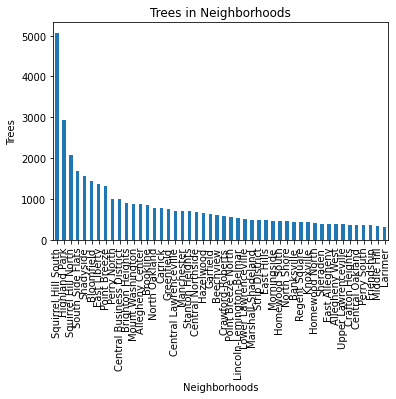

In [5]:
data_series.sort_values(ascending = False)[:].plot.bar()
plt.title('Trees in Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Trees')

Umm, I can't really see the graph properly, there are too many neighborhoods. Let's narrow the graph down to the top 10 neighborhoods.

Text(0, 0.5, 'Trees')

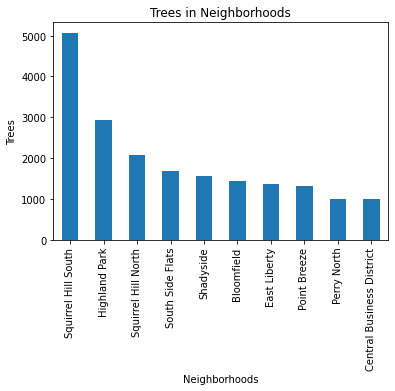

In [6]:
data_series.sort_values(ascending = False)[:10].plot.bar()
plt.title('Trees in Neighborhoods')
plt.xlabel('Neighborhoods')
plt.ylabel('Trees')

Ahh, much better. From this bar graph, we can see that Squrrel Hill South clearly has the most amount of trees. Hence, Squirrel Hill South is the best neighborhood, followed by Highland Park and Squirrel Hill North.